
Markov Chain Monte Carlo (MCMC) is a class of algorithms used to sample from probability distributions when direct sampling is difficult or inefficient. It leverages Markov chains to explore the target distribution and Monte Carlo methods to perform repeated random sampling. MCMC algorithms are widely used in the insurance industry, particularly in areas involving risk assessment, pricing, reserving, and capital modeling. Markov Chain Monte Carlo is an alternative to rejection sampling, which can be inefficient when dealing with high-dimensional probability distributions. MCMC is considered a Bayesian approach to statistical inference since it incorporates both prior knowledge and observed data into the estimation of the posterior distribution. 


The *Metropolis-Hastings* algorithm is a method used to generate a sequence of samples from a probability distribution for which direct sampling might be difficult. It is a particiular variant of MCMC, which approximates a desired distribution by creating a chain of values that resemble samples drawn from that distribution. The algorithm generates a sequence of samples by proposing new candidates and deciding whether to accept or reject them based on a ratio of probabilities from the target distribution.


Before getting into the details of Metropolis-Hastings, a few key definitions:


**Likelihood**: <br>
The apriori assumption specifying the distribution from which the data are assumed to originate. For example, if we assume losses follow an exponential distribution within unknown parameter $\theta$, this is equivalent to specifying an exponential likelihood. Symbolically, the likelihood is represented as $f(x|\theta)$.
 
  
**Prior**:<br>
Sticking with the exponential likelihood example, once we've proposed the likelihood, we need to specify a distribution for each parameter of the likelihood. In the case of the exponential there is only a single parameter, $\theta$. Typically when selecting prior distributions, it should have the same domain as the parameter itself. When parameterizing the exponential distribution, we know that $0 < \theta < \infty$, so the prior distribution should be valid on $(0, \infty)$. Valid distributions for $\theta$  are gamma, lognormal, pareto, weibull, etc. Invalid distributions would be any discrete distribution or the normal distribution. Symbolically, the prior is represented as $f(\theta)$.


**Posterior**: <br>
This is the expression which encapsulates the power, simplicity and flexibility of the Bayesian approach and is given by:

$$
\mathrm{Posterior} \propto \mathrm{Likelihood} \times \mathrm{Prior}
$$

The posterior is represented as $f(\theta|x)$, so the above expression becomes:

$$
f(\theta|x) \propto f(x|\theta) f(\theta).
$$

We can update the proportionality to direct equality by the inclusion of a normalizing constant, which ensures the expression on the RHS integrates to 1:

$$
f(\theta|x) = \frac{f(x|\theta)  f(\theta)}{f(x)}.
$$


### Metropolis-Hastings Outline

Suppose we have a collection of $\{\theta^{(1)}, \dots \theta^{(s)}\}$, to which we would like to add a new value $\theta^{(s+1)}$. We generate a sample from our transition kernel $\theta^{*}$ which is nearby $\theta^{(s)}$.

* If $f(\theta^{*}|y) > f(\theta^{(s)}|y)$, then we should include $\theta^{*}$ with probability 1.   
* If $f(\theta^{*}|y) < f(\theta^{(s)}|y)$, we will include $\theta^{*}$ with probability determined by the acceptance ratio.   


For $\theta^{*}$, the posterior is given by

$$
f(\theta^{*}|y)  = \frac{f(y|\theta^{*}) f(\theta^{*})}{f(y)},
$$


and for $\theta^{(s)}$, the posterior is given by

$$
f(\theta^{(s)}|y)  = \frac{f(y|\theta^{(s)}) f(\theta^{(s)})}{f(y)}.
$$

<br>

Next, compute the acceptance ratio, $\alpha$, as $\frac{f(\theta^{*}|y)}{f(\theta^{(s)}|y)}$:

$$
\alpha = \frac{f(\theta^{*}|y)}{f(\theta^{(s)}|y)} = \frac{f(y|\theta^{*}) f(\theta^{*})}{f(y)} \times \frac{f(y)}{f(y|\theta^{(s)}) f(\theta^{(s)})} = \frac{f(y|\theta^{*}) f(\theta^{*})}{f(y|\theta^{(s)}) f(\theta^{(s)})}.
$$ 
<br>

* If $\alpha$ >= 1: We add $\theta^{*}$ to our collection of samples, since it has a higher likelihood than $\theta^{(s)}$. Set $\theta^{(s + 1)} = \theta^{*}$.

* If $\alpha$ < 1: Set $\theta^{(s + 1)} = \theta^{*}$ with probability $\alpha$.


Notice that the acceptance ratio is calculated without needing to compute the normalizing constant $f(y)$, which can be difficult to do, especially in high-dimensional settings. This is the power of Metropolis-Hastings and MCMC in general: It provides a way to approximate the posterior distribution by generating samples from it without direct calculation of the normalizing constant. 


<br>

Metropolis-Hastings accept-reject logic can be summarized in three steps: 

1. Generate sample from proposal distribution / transition kernel $\theta^{*} \sim J(\theta|\theta^{(s)})$.
2. Compute acceptance ratio $\alpha = \frac{f(y|\theta^{*}) f(\theta^{*})}{f(y|\theta^{(s)}) f(\theta^{(s)})}$.
3. Sample $u \sim \mathrm{uniform}(0, 1)$.   
    - If $\alpha \geq u$, set $\theta^{(s + 1)} = \theta^{*}$.
    - If  $\alpha < u$, set $\theta^{(s + 1)} = \theta^{(s)}$.


<br>


### Conjugate Priors

[Conjugate priors]((https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta_rate-7)) are a class of prior distributions in Bayesian statistics that result in a posterior distribution that has the same functional form as the prior when combined with a particular likelihood function. This makes the posterior distribution easier to compute and analyze, as it remains within the same family of distributions as the prior. For example, if we select an exponential likelihood with a gamma prior, the posterior distribution is also gamma, with a specified parameterization. 

Further, many of these conjugate priors have analytical expressions for the posterior predictive distribution, which represents the modeled target output of our analysis. We can use conjugate prior relationships as a means to validate the output of our MCMC sampler. 

<br>



<br>

### Example: Conjugate Normal-Normal Model with Known Variance

Let's start with a simple example where we assume a model with normal likelihood and prior (adapted from Chapter 10 of *A First Course in Bayesian Statistical Methods* by Peter Hoff). Assume:

- $\{y_{1}, \dots, y_{n}\} \sim \mathcal{N}(\mu, \sigma^{2})$.
- $\mu \sim \mathcal{N}(\mu_{0}, \sigma^{2}_{0})$
- $\sigma^{2} = 1$
- $\mu_{0} = 5$
- $\sigma^{2}_{0} = 10$
- $y = (9.37, 10.18, 9.16, 11.60, 10.33)$


<br>
Because this model is conjugate, we have analytical expressions for the posterior parameters:
     
$$
\mu_{0}^{'} = \frac{1}{\frac{1}{\sigma^{2}_{0}} + \frac{n}{\sigma^{2}}} \Bigg(\frac{\mu_{0}}{\sigma^{2}_{0}} + \frac{\sum_{i=1}^{n} y_{i}}{\sigma^{2}} \Bigg); \hspace{.50em} {\sigma^{2}_{0}}^{'} = \Bigg( \frac{1}{\sigma^{2}_{0}} + \frac{n}{\sigma^{2}} \Bigg)^{-1}
$$

<br>

We can compute these quantities for later reference: 

In [1]:

# Compute posterior mean and variance using closed-form expressions. 
y = [9.37, 10.18, 9.16, 11.60, 10.33]
s2 = 1
mu_prior = 5
s2_prior = 10
n = len(y)

mu_posterior = (1 / (1 / s2_prior + n / s2)) * (mu_prior /  s2_prior + sum(y) / s2)
s2_posterior  = 1 / (1 / s2_prior + n / s2)

print(f"mu_prior     : {mu_prior:.3f}")
print(f"s2_prior     : {s2_prior:.3f}")
print(f"mu_posterior : {mu_posterior:.3f}")
print(f"s2_posterior : {s2_posterior:.3f}")


mu_prior     : 5.000
s2_prior     : 10.000
mu_posterior : 10.027
s2_posterior : 0.196


The posterior distribution parameter estimates have been updated in the direction of the data. Next imagine a scenario in which closed form expressions for posterior parameters did not exist, and it was necessary to use Metropolis-Hastings to approximate the posterior. The acceptance ratio comparing $\theta^{*}$ to $\theta^{(s)}$ is:

$$
\alpha = \frac{f(\theta^{*}|y)}{f(\theta^{(s)}|y)} = \Bigg(\frac{\prod_{i=1}^{n} \mathrm{dnorm}(y_{i}, \theta^{*}, \sigma)}{\prod_{i=1}^{n} \mathrm{dnorm}(y_{i}, \theta^{(s)}, \sigma)}\Bigg) \times \Bigg(\frac{\mathrm{dnorm}(\theta^{*}, \mu_{0}, \sigma_{0})}{\mathrm{dnorm}(\theta^{(s)}, \mu_{0}, \sigma_{0})}\Bigg).
$$

<br>

An implementation of Metropolis-Hastings to recover the posterior mean is provided below. 

In [2]:
"""
Implementation of Metropolis-Hastings algorithm for normal likelihood 
and normal prior with known variance.
Goal is to recover the posterior distribution of the unknown parameter mu. 
"""
import numpy as np
from scipy.stats import norm

rng = np.random.default_rng(516)


y = [9.37, 10.18, 9.16, 11.60, 10.33]

nbr_samples = 10000  # Number of samples to generate.
s = 1                # Standard deviation of likelihood.
s0 = 10**.5          # Prior standard deviation.
mu0 = 5              # Prior mean.
s_prop = 2           # Standard deviation of proposal distribution / transition kernel.

# Array to hold posterior samples, initialized with prior mean.
samples = np.zeros(nbr_samples)

# Initialize prior density.
prior = norm(loc=mu0, scale=s0)

# Track the number of accepted samples. 
accepted = 0

for ii in range(1, nbr_samples):

    # Get most recently accepted sample.
    theta = samples[ii - 1]

    # Generate sample from proposal distribution.
    theta_star = rng.normal(loc=theta, scale=s_prop)

    # Compute numerator and denominator of acceptance ratio.
    numer = np.prod(norm(loc=theta_star, scale=s).pdf(y)) * prior.pdf(theta_star)
    denom = np.prod(norm(loc=theta, scale=s).pdf(y)) * prior.pdf(theta)
    ar = numer / denom

    # Generate random uniform sample.
    u = rng.uniform(low=0, high=1)
    
    # Check whether theta_star should be added to samples by comparing ar with u.
    if ar >= u:
        theta = theta_star
        accepted+=1

    # Update samples array.
    samples[ii] = theta

    if ii % 1000 == 0:
        print(f"{ii}: theta_star: {theta_star:.5f}, ar: {ar:.5f}, curr_rate: {accepted / ii:.5f}")

acc_rate = accepted / nbr_samples

print(f"\nAcceptance rate     : {acc_rate:.3f}.")
print(f"Posterior mean (mh) : {samples.mean():.5f}.")
print(f"Posterior mean (cp) : {mu_posterior:.5f}.")


1000: theta_star: 9.35597, ar: 1.08038, curr_rate: 0.24600
2000: theta_star: 13.01504, ar: 0.00000, curr_rate: 0.25900
3000: theta_star: 9.28924, ar: 0.27716, curr_rate: 0.25567
4000: theta_star: 8.22652, ar: 0.00034, curr_rate: 0.26200
5000: theta_star: 6.09725, ar: 0.00000, curr_rate: 0.26440
6000: theta_star: 10.27182, ar: 2.13374, curr_rate: 0.26483
7000: theta_star: 10.73066, ar: 0.30604, curr_rate: 0.26414
8000: theta_star: 12.76409, ar: 0.00000, curr_rate: 0.26637
9000: theta_star: 8.88424, ar: 0.03592, curr_rate: 0.26522

Acceptance rate     : 0.267.
Posterior mean (mh) : 10.03768.
Posterior mean (cp) : 10.02745.



Generally the acceptance rate should fall between 20%-40%, so our result seems reasonable, if not a little on the low side. 

In the Metropolis-Hastings update step, we compute the product of many potentially small numbers to determine the acceptance ratio, which can be numerically unstable. We can instead compute the log of the RHS of the acceptance ratio, which will result in more stability especially as the number of data points increases. The posterior estimates will be no different, but we reduce the chance of numerical underflow by replacing the product with a sum. The update step using the log basis is given below:
 

In [3]:
"""
Implementation of Metropolis-Hastings algorithm for Normal likelihood 
and Normal prior with known variance.
Goal is to recover the posterior distribution of the unknown parameter mu. 
"""
import numpy as np
from scipy.stats import norm

rng = np.random.default_rng(516)


y = [9.37, 10.18, 9.16, 11.60, 10.33]

nbr_samples = 10000  # Number of samples to generate.
s = 1                # Standard deviation of likelihood.
s0 = 10**.5          # Prior standard deviation.
mu0 = 5              # Prior mean.
s_prop = 2           # Standard deviation of proposal distribution / transition kernel.

# Array to hold posterior samples, initialized with prior mean.
samples = np.zeros(nbr_samples)

# Initialize prior density.
prior = norm(loc=mu0, scale=s0)

# Track the number of accepted samples. 
accepted = 0

for ii in range(1, nbr_samples):

    # Get most recently accepted sample.
    theta = samples[ii - 1]

    # Generate sample from proposal distribution.
    theta_star = rng.normal(loc=theta, scale=s_prop)

    # Compute numerator and denominator of acceptance ratio using log basis. 
    ar = (np.sum(norm(loc=theta_star, scale=s).logpdf(y)) + prior.logpdf(theta_star)) -\
         (np.sum(norm(loc=theta, scale=s).logpdf(y)) + prior.logpdf(theta))

    # Generate random uniform sample.
    u = rng.uniform(low=0, high=1)
    
    # Check whether theta_star should be added to samples by comparing a with u.
    if ar >= np.log(u):
        theta = theta_star
        accepted+=1

    # Update samples array.
    samples[ii] = theta

    if ii % 1000 == 0:
        print(f"{ii}: theta_star: {theta_star:.5f}, ar: {ar:.5f}, curr_rate: {accepted / ii:.5f}")


acc_rate = accepted / nbr_samples

print(f"\nAcceptance rate   : {acc_rate:.3f}.")
print(f"Posterior mean (mh) : {samples.mean():.5f}.")
print(f"Posterior mean (cp) : {mu_posterior:.5f}.")


1000: theta_star: 9.35597, ar: 0.07731, curr_rate: 0.24600
2000: theta_star: 13.01504, ar: -20.59962, curr_rate: 0.25900
3000: theta_star: 9.28924, ar: -1.28315, curr_rate: 0.25567
4000: theta_star: 8.22652, ar: -7.99570, curr_rate: 0.26200
5000: theta_star: 6.09725, ar: -39.02023, curr_rate: 0.26440
6000: theta_star: 10.27182, ar: 0.75788, curr_rate: 0.26483
7000: theta_star: 10.73066, ar: -1.18404, curr_rate: 0.26414
8000: theta_star: 12.76409, ar: -18.37748, curr_rate: 0.26637
9000: theta_star: 8.88424, ar: -3.32637, curr_rate: 0.26522

Acceptance rate   : 0.267.
Posterior mean (mh) : 10.03768.
Posterior mean (cp) : 10.02745.



As expected, this aligns with the original non-log basis results. 

We can visualize the distribution of posterior samples as well as the traceplot. Traceplots are graphical tools used to diagnose the convergence and mixing of MCMC simulations. They help assess whether the algorithm has properly explored the target distribution and whether the samples are representative of the posterior distribution.


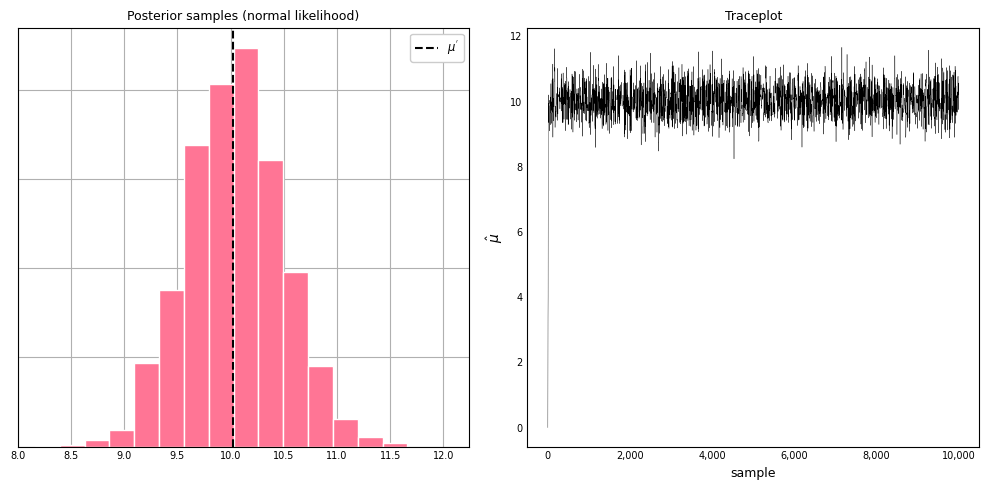

In [4]:

import matplotlib as mpl
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), tight_layout=True) 

ax[0].set_title("Posterior samples (normal likelihood)", color="#000000", loc="center", fontsize=9)
ax[0].hist(
    samples, 50, density=True, alpha=1, color="#ff7595", 
    edgecolor="#FFFFFF", linewidth=1.0
    )
    
ax[0].axvline(mu_posterior, color="#000000", linewidth=1.5, linestyle="--", label=r"$\mu^{'}$")
ax[0].set_yticklabels([])
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_xlim(8)
ax[0].tick_params(axis="x", which="major", direction='in', labelsize=7)
ax[0].tick_params(axis="x", which="minor", direction='in', labelsize=7)
ax[0].tick_params(axis="y", which="major", direction='in', labelsize=7)
ax[0].tick_params(axis="y", which="minor", direction='in', labelsize=7)
ax[0].xaxis.set_ticks_position("none")
ax[0].yaxis.set_ticks_position("none")
ax[0].grid(True)   
ax[0].set_axisbelow(True) 
ax[0].legend(loc="upper right", fancybox=True, framealpha=1, fontsize="small")

ax[1].set_title("Traceplot", color="#000000", loc="center", fontsize=9)
ax[1].plot(samples, color="#000000", linewidth=.25, linestyle="-")
ax[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_xlabel("sample", fontsize=9)
ax[1].set_ylabel(r"$\hat \mu$")
ax[1].tick_params(axis="x", which="major", direction='in', labelsize=7)
ax[1].tick_params(axis="y", which="major", direction='in', labelsize=7)
ax[1].xaxis.set_ticks_position("none")
ax[1].yaxis.set_ticks_position("none")

plt.show()



Notice in the traceplot that even though we started far from the estimated posterior mean, it made little difference, as the algorithm was able to quickly zero in on the region of higher likelihood. You want to see that the samples have stabilized around a certain value after an initial "burn-in" period. If the trace shows significant fluctuations without settling, it may indicate that the chain has not yet converged. This is not the case with our samples. 

<br>

## Severity Modeling 

MCMC approaches can be leveraged to estimate severity or size-of-loss curves for a given line of business based on past claim  history. Severity estimates are used in multiple actuarial contexts, especially reserving and capital modeling. Imagine we have loss data we believe originates from an exponential distribution with unknown rate parameter:


> 266, 934, 138


We again assume a conjugate relationship between prior and posterior distributions:

- **Likelihood**: Losses are exponentially distributed with unknown rate $\lambda$.

- **Prior**: Gamma with $\alpha_{0}$, $\beta_{0}$. 

- **Posterior**: Gamma with $\alpha^{'} = \alpha_{0} + n$ and $\beta^{'} = \beta_{0} + \sum_{i=1}^{n} x_{i}$.

- **Posterior predictive**: Lomax (shifted Pareto with support beginning at zero) with $\alpha^{'}, \beta^{'}$. The expected value of the posterior predictive distribution is $\frac{\beta^{'}}{\alpha^{'} - 1}$.


We judgmentally set $\alpha_{0} = 2$ and $\beta_{0} = 1,000$. Prior and posterior predictive means are computed in the next cell.



In [5]:

y = [266, 934, 138]

# Judgmentally select a0 and b0.
a0 = 2
b0 = 1000
n = len(y)
a_posterior = a0 + n
b_posterior = b0 + np.sum(y)
prior_mean = a0 * b0
post_pred_mean = b_posterior / (a_posterior - 1)

print(f"a0              : {a0}")
print(f"b0              : {b0}")
print(f"a_posterior     : {a_posterior}.")
print(f"b_posterior     : {b_posterior}.")
print(f"Empirical mean  : {np.mean(y)}")
print(f"Prior mean      : {prior_mean}")
print(f"Post. pred. mean: {post_pred_mean:.2f}")


a0              : 2
b0              : 1000
a_posterior     : 5.
b_posterior     : 2338.
Empirical mean  : 446.0
Prior mean      : 2000
Post. pred. mean: 584.50



<br>

Using Metropolis-Hastings, the mean of generated samples should match the posterior predictive mean obtained from the analytical expression (584.50 above). Adapting the sampling code from the previous model, an exponential distribution is used to generate proposals, since the exponential scale parameter must be strictly greater than 0. We have the following:

In [6]:
"""
Implementation of Metropolis-Hastings algorithm for exponential likelihood
with gamma prior.
Goal is to recover the posterior distribution of the unknown parameter lambda. 
"""
import numpy as np
from scipy.stats import expon, norm, gamma, lomax

rng = np.random.default_rng(516)

nbr_samples = 10000
y = [266, 934, 138]
a0 = 2
b0 = 1000


# Array to hold posterior samples, initialized with prior mean.
samples = np.zeros(nbr_samples)
samples[0] = np.mean(y)

# Initialize prior density.
prior = gamma(a=a0, loc=0, scale=b0)

# Track the number of accepted samples. 
accepted = 0

for ii in range(1, nbr_samples):

    # Get most recently accepted sample.
    theta = samples[ii - 1]

    # Generate sample from proposal distribution.
    theta_star = rng.exponential(scale=theta)

    # Compute numerator and denominator of acceptance ratio.
    numer = np.prod(expon(scale=theta_star).pdf(y)) * prior.pdf(theta_star)
    denom = np.prod(expon(scale=theta).pdf(y)) * prior.pdf(theta)
    ar = numer / denom

    # Generate random uniform sample.
    u = rng.uniform(low=0, high=1)
    
    # Check whether theta_star should be added to samples by comparing ar with u.
    if ar >= u:
        theta = theta_star
        accepted+=1

    # Update samples array.
    samples[ii] = theta

    if ii % 1000 == 0:
        print(f"{ii}: theta_star: {theta_star:.5f}, ar: {ar:.5f}, curr_rate: {accepted / ii:.5f}")

acc_rate = accepted / nbr_samples

print(f"\nAcceptance rate    : {acc_rate:.3f}.")
print(f"Posterior sample mean: {samples.mean():.3f}.")


1000: theta_star: 82.99100, ar: 0.00008, curr_rate: 0.45900
2000: theta_star: 544.00186, ar: 1.07857, curr_rate: 0.46450
3000: theta_star: 246.98682, ar: 0.33871, curr_rate: 0.47433
4000: theta_star: 73.75990, ar: 0.00002, curr_rate: 0.47900
5000: theta_star: 451.83333, ar: 0.97910, curr_rate: 0.47880
6000: theta_star: 607.07687, ar: 1.45090, curr_rate: 0.47833
7000: theta_star: 1509.11070, ar: 0.74937, curr_rate: 0.48186
8000: theta_star: 677.30894, ar: 1.04365, curr_rate: 0.48187
9000: theta_star: 740.90659, ar: 1.58914, curr_rate: 0.48156

Acceptance rate    : 0.481.
Posterior sample mean: 586.353.



<br>

Visualizing the histogram of posterior samples along with the traceplot:

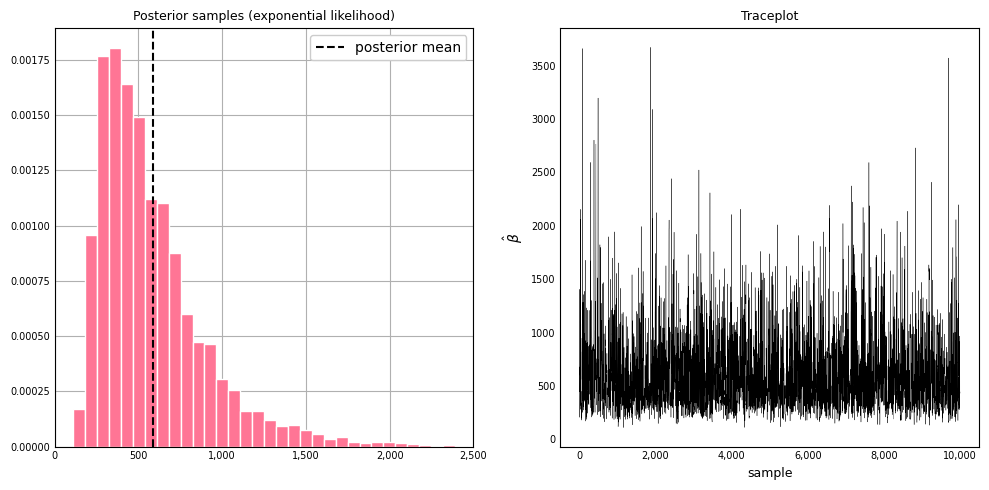

In [8]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), tight_layout=True) 

ax[0].set_title(
    "Posterior samples (exponential likelihood)", 
    color="#000000", loc="center", fontsize=9
)
ax[0].hist(
    samples, 50, density=True, alpha=1, color="#ff7595", 
    edgecolor="#FFFFFF", linewidth=1.0
)
ax[0].axvline(
    samples.mean(), color="#000000", linewidth=1.5, linestyle="--", 
    label="posterior mean"
)

ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_xlim(0, 2500)
ax[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].tick_params(axis="x", which="major", direction='in', labelsize=7)
ax[0].tick_params(axis="x", which="minor", direction='in', labelsize=7)
ax[0].tick_params(axis="y", which="major", direction='in', labelsize=7)
ax[0].tick_params(axis="y", which="minor", direction='in', labelsize=7)
ax[0].xaxis.set_ticks_position("none")
ax[0].yaxis.set_ticks_position("none")
ax[0].grid(True)   
ax[0].set_axisbelow(True) 
ax[0].legend(loc="upper right", fancybox=True, framealpha=1, fontsize="medium")

ax[1].set_title("Traceplot", color="#000000", loc="center", fontsize=9)
ax[1].plot(samples, color="#000000", linewidth=.25, linestyle="-")
ax[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_xlabel("sample", fontsize=9)
ax[1].set_ylabel(r"$\hat \beta$")
ax[1].tick_params(axis="x", which="major", direction='in', labelsize=7)
ax[1].tick_params(axis="y", which="major", direction='in', labelsize=7)
ax[1].xaxis.set_ticks_position("none")
ax[1].yaxis.set_ticks_position("none")

plt.show()


<br>

The distribution of posterior samples resembles a gamma distribution, which we expect. 


Next, to generate posterior predictive samples, we randomly sample from an exponential distribution parameterized using each scale parameter. This is accomplished in the next cell:

In [9]:
"""
Generate posterior predictive samples, one random draw per posterior scale sample.
"""

post_pred_samples = rng.exponential(scale=samples)

print(f"Posterior predictive mean (cp): {post_pred_mean:.5f}")
print(f"Posterior predictive mean (mh): {post_pred_samples.mean():.5f}")


Posterior predictive mean (cp): 584.50000
Posterior predictive mean (mh): 585.71307


<br>

We can overlay the posterior predictive distribution with the histogram of posterior predictive samples and assess how well they match:

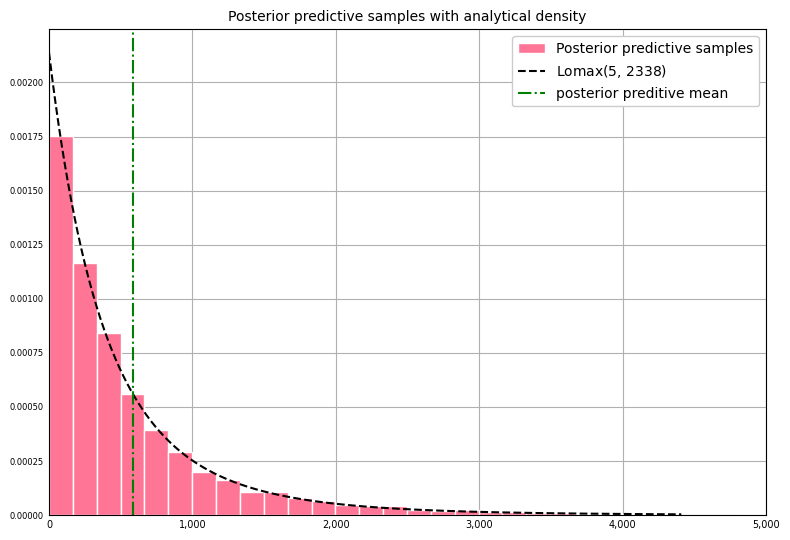

In [10]:

import matplotlib as mpl
import matplotlib.pyplot as plt

pp = lomax(c=a_posterior, scale=b_posterior)
xx = np.linspace(0, pp.ppf(.995), 1000)
yy = pp.pdf(xx)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5), tight_layout=True) 

ax.set_title("Posterior predictive samples with analytical density", color="#000000", loc="center", fontsize=10)

ax.hist(
    post_pred_samples, 100, density=True, alpha=1, color="#ff7595", 
    edgecolor="#FFFFFF", linewidth=1.0, label="Posterior predictive samples"
)
ax.plot(
    xx, yy, alpha=1, color="#000000", linewidth=1.5, linestyle="--", 
    label=r"$\mathrm{Lomax}($" + f"{a_posterior:.0f}, {b_posterior:.0f}" + r"$)$"
)
ax.axvline(
    post_pred_mean, color="green", linewidth=1.5, linestyle="-.", 
    label="posterior preditive mean"
)

ax.set_xlim(0, 5000)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="x", which="major", direction='in', labelsize=7)
ax.tick_params(axis="x", which="minor", direction='in', labelsize=7)
ax.tick_params(axis="y", which="major", direction='in', labelsize=6)
ax.tick_params(axis="y", which="minor", direction='in', labelsize=6)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)   
ax.set_axisbelow(True) 
ax.legend(loc="upper right", fancybox=True, framealpha=1, fontsize="medium")
plt.show()



<br>

The plot shows the two distributions align well. Finally, we can compare quantiles of our posterior predictive samples with the analytical density to see how well they agree in the extreme left and right tails:


In [11]:

import pandas as pd

q = [.01, .025, .05, .10, .25, .50, .75, .90, .95, .99, .995, .999]

df = pd.DataFrame({
    "q": q,
    "cp": pp.ppf(q), 
    "mh": np.quantile(post_pred_samples, q)
})

df["error"] = 100 * (df["cp"] - df["mh"]) / df["cp"] 

df.head(12)


,q,cp,mh,error
0,0.010,4.704263,4.841719,-2.921931
1,0.025,11.868630,12.136623,-2.257991
2,0.050,24.108192,23.368946,3.066368
3,0.100,49.789318,47.340357,4.918647
4,0.250,138.465340,135.870227,1.874197
5,0.500,347.656754,347.845394,-0.054260
6,0.750,747.009495,736.928440,1.349522
7,0.900,1367.480284,1387.431296,-1.458962
8,0.950,1918.479107,1958.620885,-2.092375
9,0.990,3534.790477,3488.275714,1.315913



<br>

In the table above:

- `q` represents the target quantile.
- `cp` represents analytical quantiles from the conjugate prior posterior predictive distribution. 
- `mh` represents quantiles from the Metropolis-Hastings generated posterior predictive samples.
- `error` represents the percent deviation from analytical quantiles. 

Even at q=0.999, `cp` and `mh` differ by less than 1.50%. 

Unfortunately, most distributional relationships used in practice are not conjugate. But by leveraging conjugate relationships we were able to demonstrate that when the same likelihood, prior and loss data are used, Metropolis-Hastings will yield distributional estimates of the posterior predictive distribution very to close to the analytical distribution.

While implementing your own MCMC sampler is a great way to gain a better understanding of the inner workings of Markov Chain Monte Carlo, in practice it is almost always preferrable to an optimized MCMC library such as PyStan or PyMC3. These will be explored in a future post.
